<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-03 20:13:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  46.4MB/s    in 4.8s    

2025-06-03 20:13:11 (41.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [12]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


       CompTotal
0      2040000.0
1        28000.0
2        85000.0
3        50000.0
4       110000.0
...          ...
33735    36000.0
33736    40000.0
33737    61000.0
33738    58000.0
33739    55000.0

[33740 rows x 1 columns]


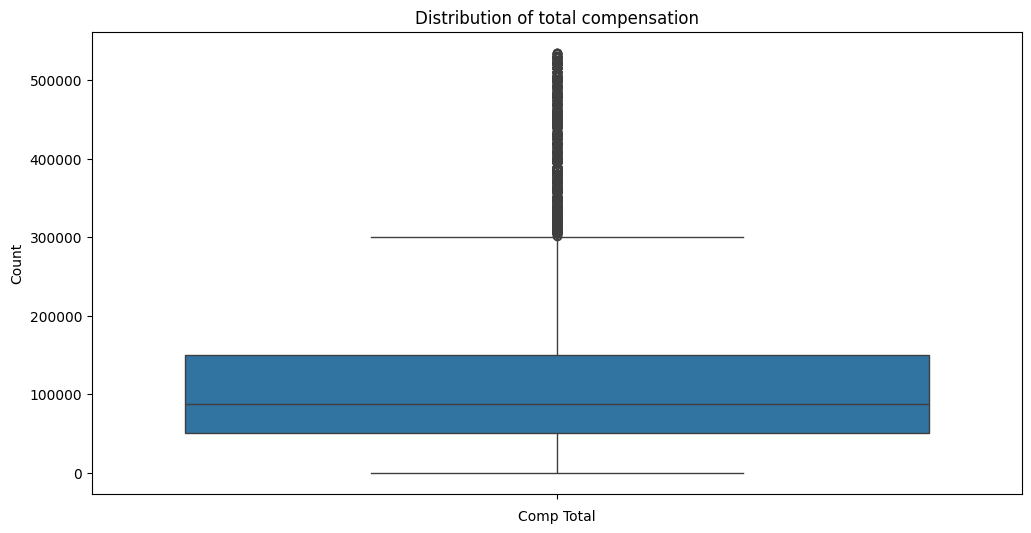

In [13]:
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
print(df)


box_plot = df[['CompTotal']].dropna()

Q1 = box_plot['CompTotal'].quantile(0.25)
Q3 = box_plot['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_box_plot = box_plot[(box_plot['CompTotal'] >= lower_bound) & (box_plot['CompTotal'] <= upper_bound)]


plt.figure(figsize=(12,6))
sns.boxplot(data = filtered_box_plot, y='CompTotal')

plt.xlabel('Comp Total')
plt.ylabel('Count')
plt.title('Distribution of total compensation')

plt.xticks(rotation=90)

plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


               Age
0  18-24 years old
1  25-34 years old
2  35-44 years old
3  45-54 years old
4  55-64 years old
               Age  AgeNumeric
0  18-24 years old        18.0
1  25-34 years old        25.0
2  35-44 years old        35.0
3  45-54 years old        45.0
4  55-64 years old        55.0


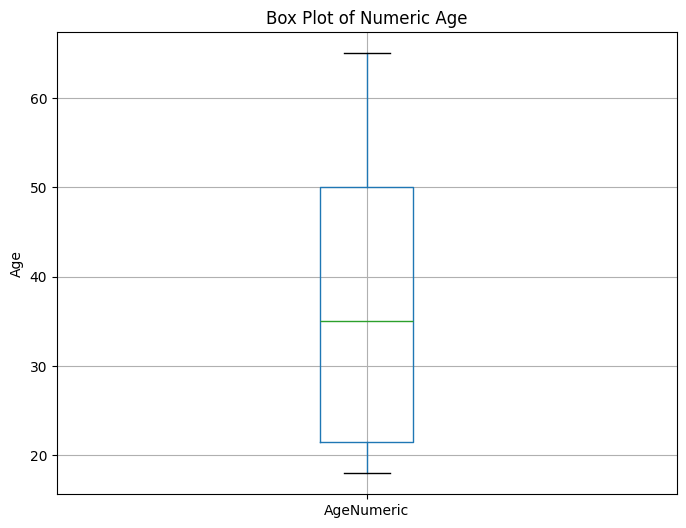

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import re


conn = sqlite3.connect('survey-results-public.sqlite')

QUERY = "SELECT Age FROM main GROUP BY Age "
df = pd.read_sql_query(QUERY, conn)

print(df.head())

def extract_age(text):
    if pd.isna(text):
        return None
    match = re.search(r'(\d+)', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

df['AgeNumeric'] = df['Age'].apply(extract_age)


df = df.dropna(subset=['AgeNumeric'])
print(df.head())

df.boxplot(column='AgeNumeric', figsize=(8,6))
plt.title('Box Plot of Numeric Age')
plt.ylabel('Age')
plt.show()

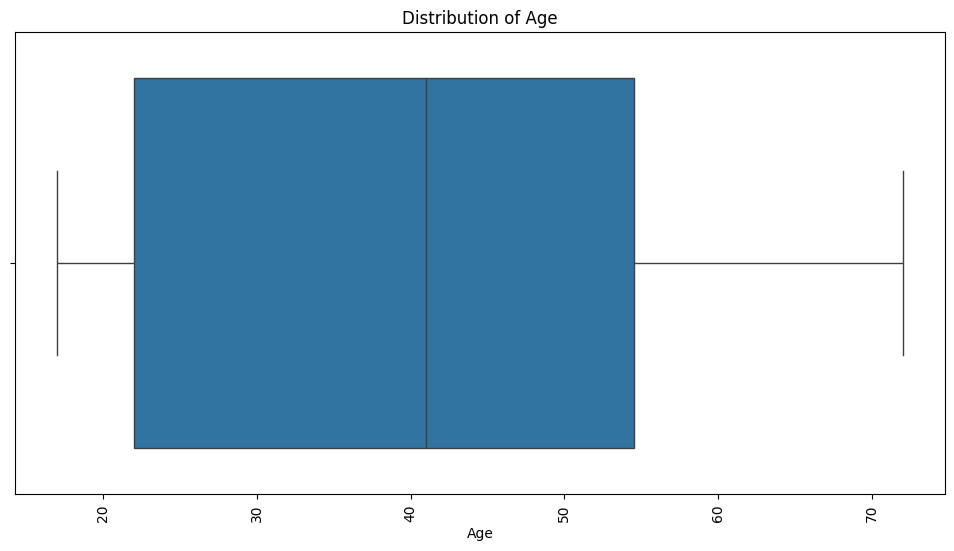

In [15]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import re

conn = sqlite3.connect('survey-results-public.sqlite')

QUERY = "SELECT Age FROM main GROUP BY Age "
df = pd.read_sql_query(QUERY, conn)
ages = df[['Age']].dropna().copy()

def convert_age(value):
    if value == 'Under 18 years old':
        return random.randint(0, 17)
    elif value == '18-24 years old':
        return random.randint(18, 24)
    elif value == '25-34 years old':
        return random.randint(25, 34)
    elif value == '35-44 years old':
        return random.randint(35, 44)
    elif value == '45-54 years old':
        return random.randint(45, 54)
    elif value == '55-64 years old':
        return random.randint(55, 64)
    elif value == '65 years or older':
        return random.randint(65, 110)
    else:
        return None

ages['Age'] = ages['Age'].apply(convert_age)

ages = ages.dropna()

ages = ages.sort_values(by='Age', ascending=True)

plt.figure(figsize=(12,6))
sns.boxplot(data=ages, x='Age')

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.xticks(rotation=90)
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


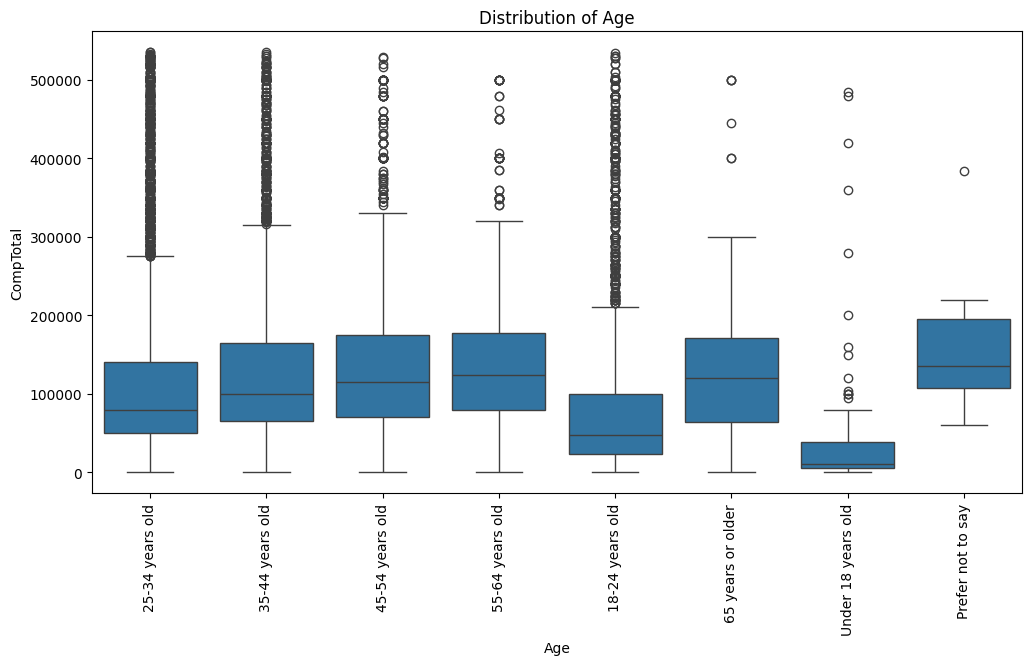

In [23]:
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

task_2 = df[['Age', 'CompTotal']].dropna().copy()


column = 'CompTotal'

Q1 = task_2[column].quantile(0.25)
Q3 = task_2[column].quantile(0.75)

IQR = Q3 -Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

without_outliers = task_2[(task_2[column] >= lower_bound) & (task_2[column] <= upper_bound)]

plt.figure(figsize=(12,6))
sns.boxplot(data=without_outliers, x='Age', y='CompTotal')

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.xticks(rotation=90)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x800 with 0 Axes>

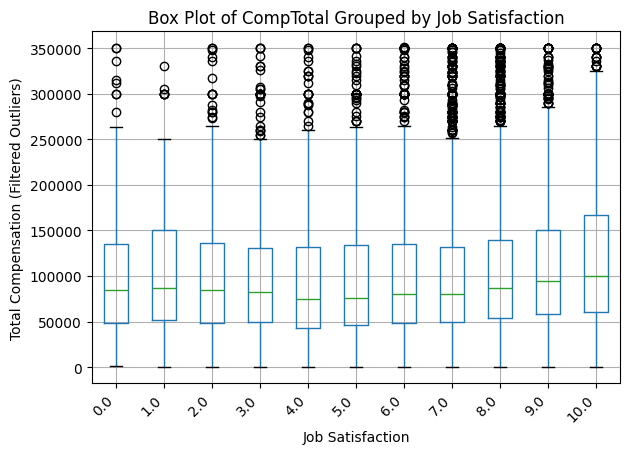

In [6]:
QUERY = """
SELECT JobSat, CompTotal
FROM main
WHERE JobSat IS NOT NULL AND CompTotal IS NOT NULL
"""
df_jobsat_comp = pd.read_sql_query(QUERY, conn)

Q1 = df_jobsat_comp['CompTotal'].quantile(0.25)
IQR = df_jobsat_comp['CompTotal'].quantile(0.75) - Q1
df_jobsat_comp_filtered = df_jobsat_comp[(df_jobsat_comp['CompTotal'] >= Q1 - 1.5*IQR) & (df_jobsat_comp['CompTotal'] <= Q1 + 1.5*IQR)]


plt.figure(figsize=(12, 8))
df_jobsat_comp_filtered.boxplot(column='CompTotal', by='JobSat')
plt.title('Box Plot of CompTotal Grouped by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Total Compensation (Filtered Outliers)')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [11]:
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL limit 5
"""
df_devtype_comp = pd.read_sql_query(QUERY, conn)
print(df_devtype_comp)


                                         DevType  ConvertedCompYearly
0  Data scientist or machine learning specialist               7322.0
1                            Academic researcher              30074.0
2  Data scientist or machine learning specialist              91295.0
3                            Developer, back-end              53703.0
4                                        Student             110000.0


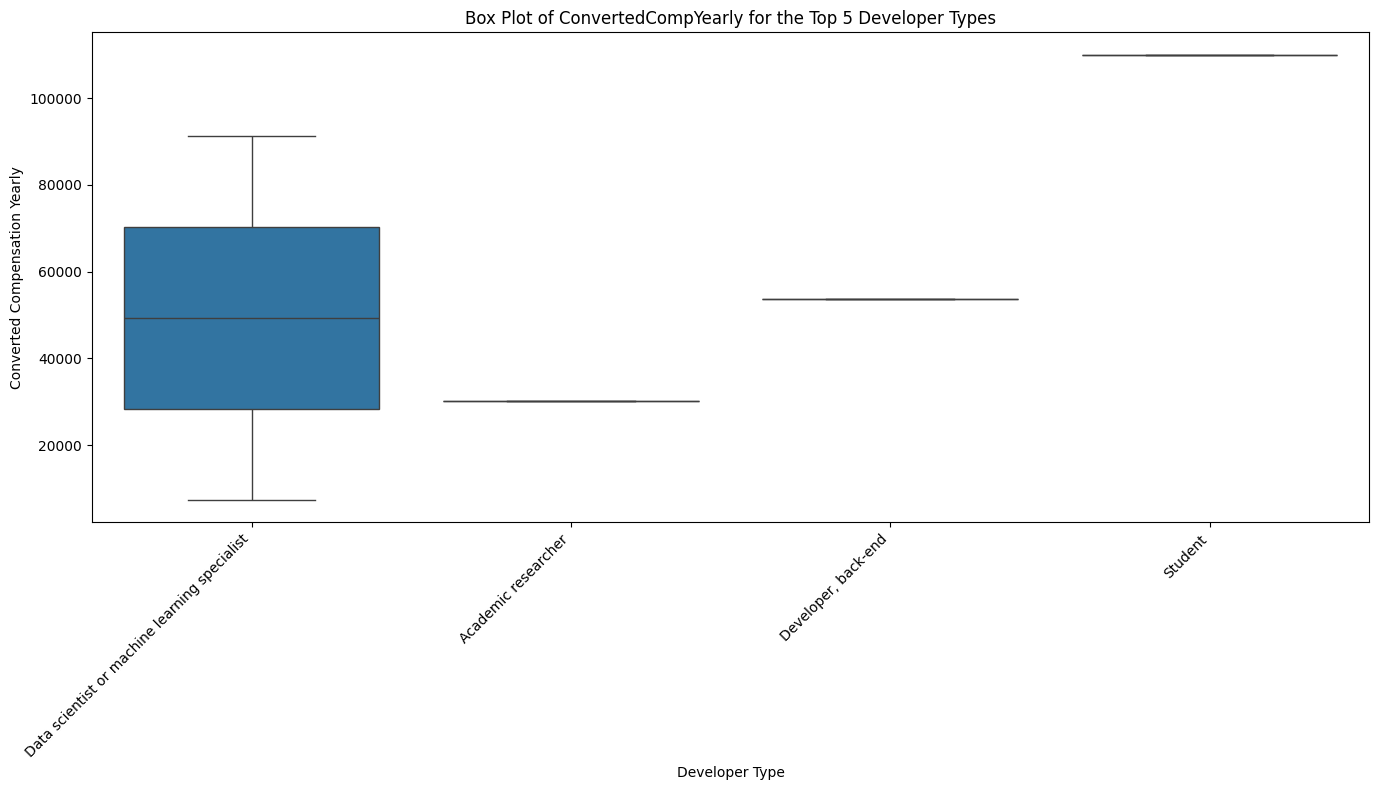

In [12]:
top5_devtypes = df_devtype_comp['DevType'].value_counts().nlargest(5).index

df_top5_devtype_comp = df_devtype_comp[df_devtype_comp['DevType'].isin(top5_devtypes)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly',data = df_top5_devtype_comp)
plt.title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


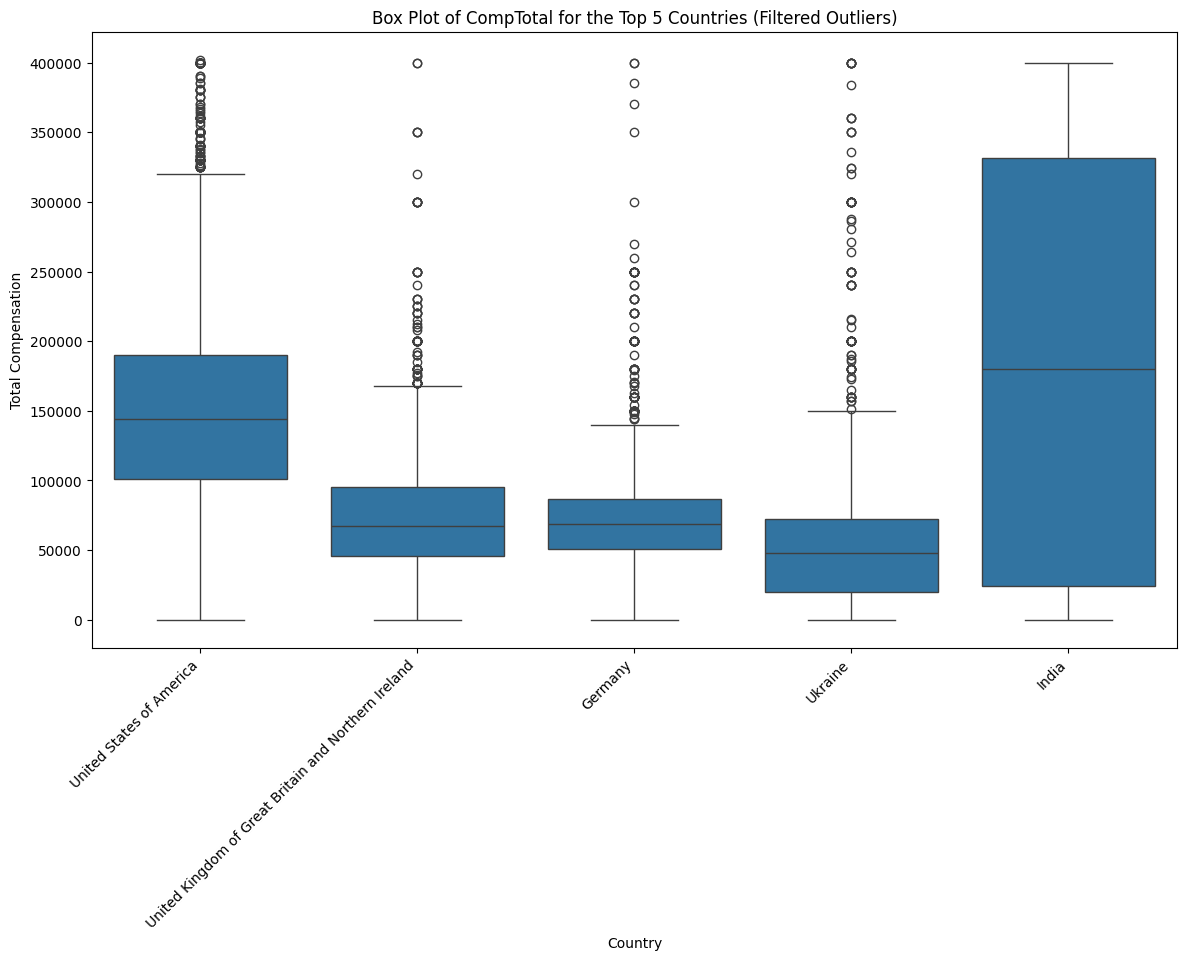

In [20]:
QUERY = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df_country_comp = pd.read_sql_query(QUERY, conn)

top5_countries = df_country_comp['Country'].value_counts().nlargest(5).index

df_top5_country_comp = df_country_comp[df_country_comp['Country'].isin(top5_countries)]

Q1 = df_top5_country_comp['CompTotal'].quantile(0.25)
Q3 = df_top5_country_comp['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_top5_country_comp_filtered = df_top5_country_comp[(df_top5_country_comp['CompTotal'] >= lower_bound) & (df_top5_country_comp['CompTotal'] <= upper_bound)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top5_country_comp_filtered)
plt.title('Box Plot of CompTotal for the Top 5 Countries (Filtered Outliers)')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


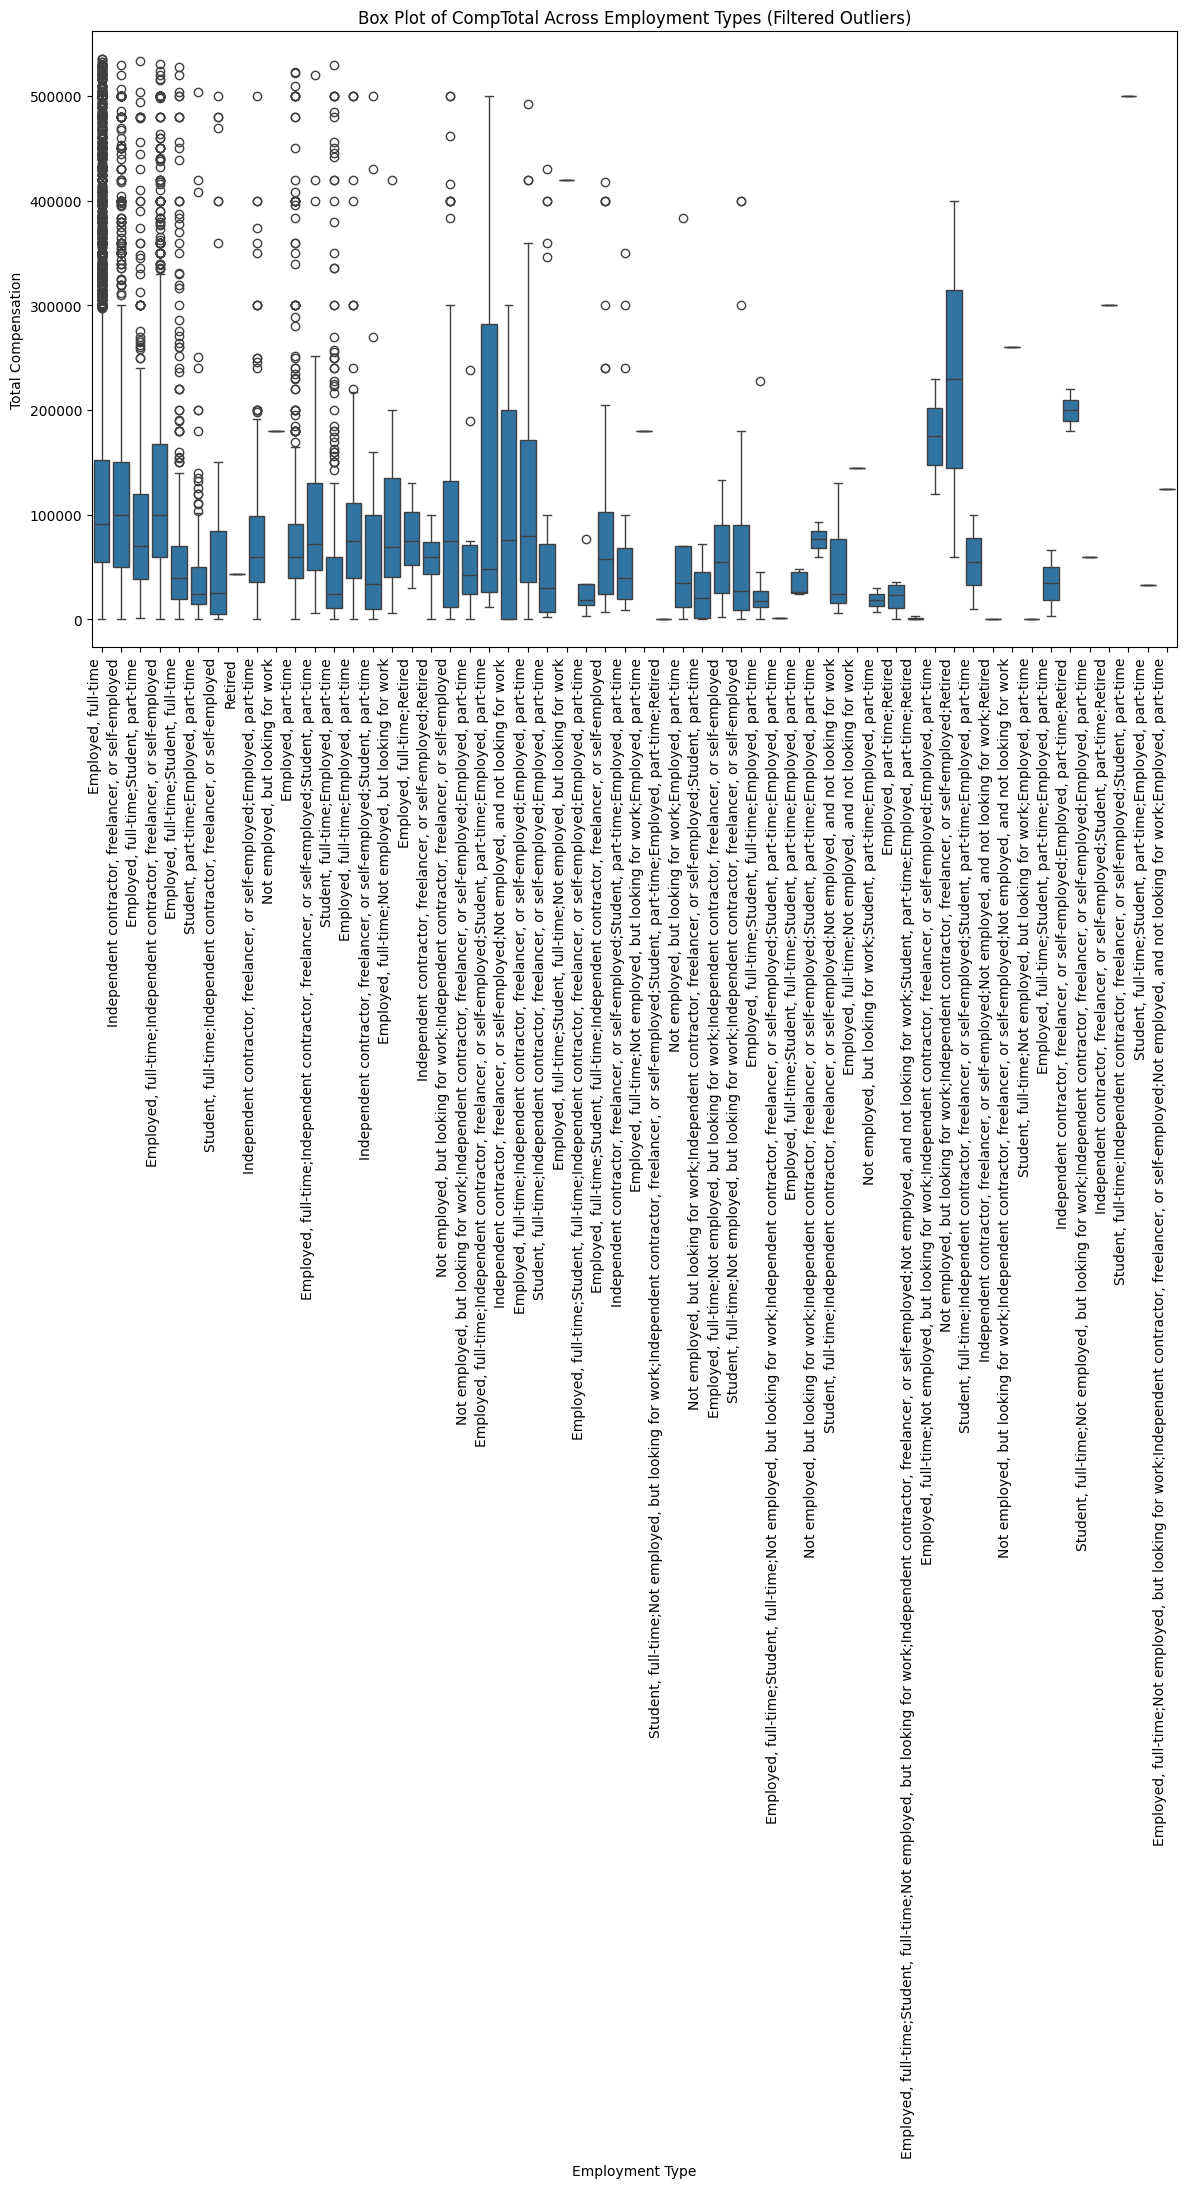

In [24]:
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df_employment_comp = pd.read_sql_query(QUERY, conn)

Q1 = df_employment_comp['CompTotal'].quantile(0.25)
Q3 = df_employment_comp['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_employment_comp_filtered = df_employment_comp[(df_employment_comp['CompTotal'] >= lower_bound) & (df_employment_comp['CompTotal'] <= upper_bound)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Employment', y='CompTotal', data=df_employment_comp_filtered)
plt.title('Box Plot of CompTotal Across Employment Types (Filtered Outliers)')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.xticks(rotation=90, ha='right')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


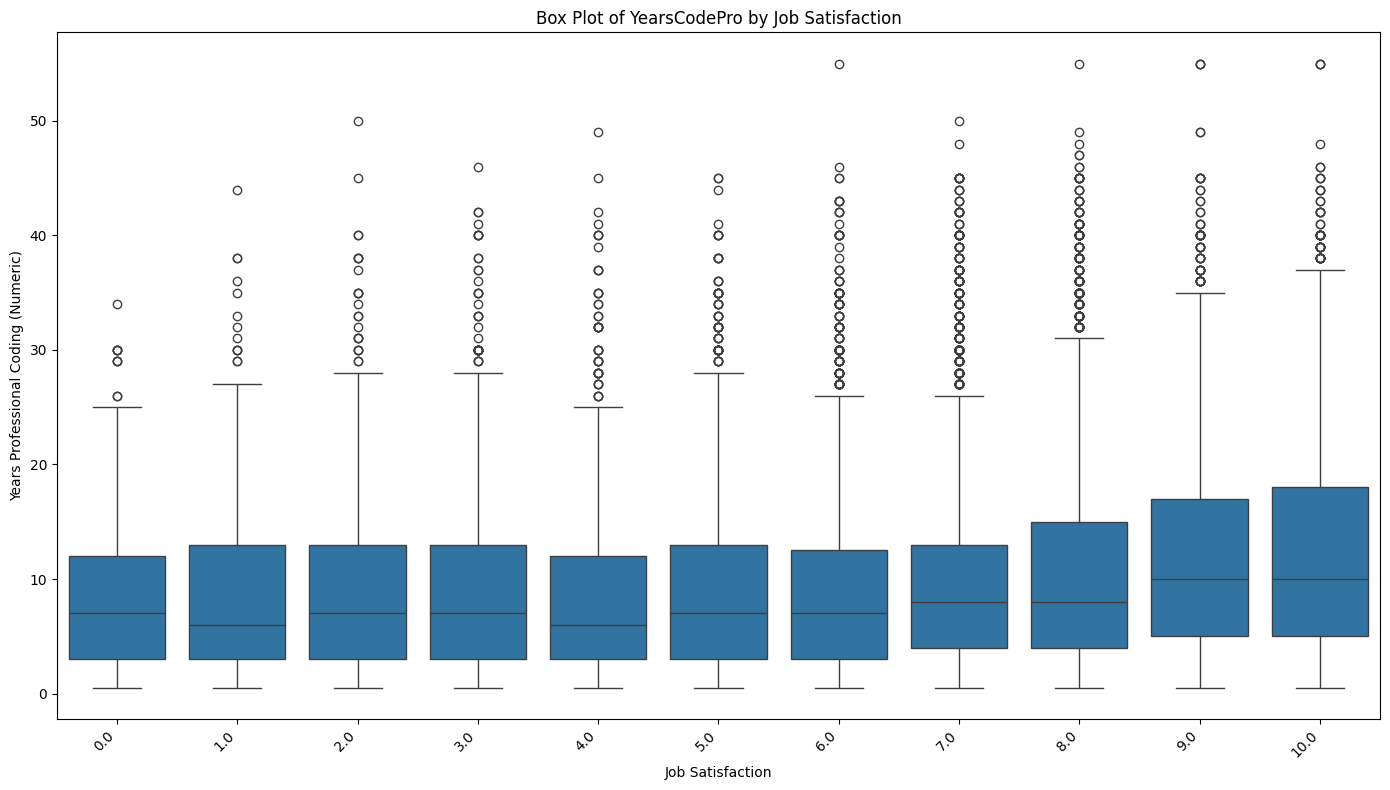

In [31]:
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df_jobsat_yearscodepro = pd.read_sql_query(QUERY, conn)

def years_to_numeric(years):
    if years == 'Less than 1 year':
        return 0.5

    elif years == 'More than 50 years':
        return 55
    else:
        try:
            return float(years)
        except ValueError:
            return None

df_jobsat_yearscodepro['YearsCodeProNumeric'] = df_jobsat_yearscodepro['YearsCodePro'].apply(years_to_numeric)


plt.figure(figsize=(14, 8))
sns.boxplot(x='JobSat', y='YearsCodeProNumeric', data=df_jobsat_yearscodepro)
plt.title('Box Plot of YearsCodePro by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years Professional Coding (Numeric)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [33]:
conn.close()
print("Connection closed")

Connection closed


## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
